In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Functions 

def Split_By_Ages(data):
    three = data[0:1102]
    eighteen = data[1102:2623]
    twentyfour = data[2623:3855]
    return three, eighteen, twentyfour


def remove_nan(A,B):
    new_A = np.array([])
    new_B = np.array([])
    new_C = np.array([])
    for i in range(0,np.size(A)):
        if not np.isnan(A[i]) and not np.isnan(B[i]):
            new_A = np.append(new_A, A[i])
            new_B = np.append(new_B, B[i])
    return new_A, new_B


#For some reason python is returning complex values with imaginary part = 0
def remove_complex(A):
    new_A = np.array([])
    for i in range(0, np.size(A)):
        new_A = np.append(new_A, np.real(A[i]))
    return new_A

def Norm_Mutual_Info_Chan_Cap_Four_State(TF, TG):
    size = np.size(TF)
    a_count = 0
    b_count = 0
    c_count = 0
    for i in range(0,size):
        if TF[i] == 0 and TG[i] == 0:
            a_count += 1
        elif TF[i] != 0 and TG[i] == 0:
            b_count += 1
        elif TF[i] == 0 and TG[i] != 0:
            c_count += 1
    
    a = a_count/size
    b = b_count/size
    c = c_count/size
    d = 1 - a - b - c

    alpha = a + c
    beta = b/(1 - alpha)
    gamma = c/alpha
    x = alpha*(1 - beta - gamma) + beta

    B = (((beta**beta)*((1-beta)**(1-beta)))/((gamma**gamma)*((1-gamma)**(1-gamma))))**(1/(1 - beta - gamma))
    x_s = 1/(1+B)
    alpha_s = (x_s - beta)/(1 - beta - gamma)


    #I1: -(1 - gamma)*alpha*np.log(x/(1 - gamma))
    if (1 - gamma)*alpha == 0:
        I1 = 0
    elif x == 0: 
        I1 = np.NaN
    else:
        I1 = -(1 - gamma)*alpha*np.log(x/(1 - gamma))

    #I2: -beta*(1 - alpha)*np.log(x/beta)
    if beta*(1 - alpha) == 0:
        I2 = 0
    elif x == 0:
        I2 == np.NaN
    else: 
        I2 = -beta*(1 - alpha)*np.log(x/beta)
    
    #I3: -gamma*alpha*np.log((1 - x)/gamma)
    if gamma*alpha == 0:
        I3 = 0
    elif 1 - x == 0:
        I3 = np.NaN
    else:
        I3 = -gamma*alpha*np.log((1 - x)/gamma)

    #I4: -(1 - beta)*(1 - alpha)*np.log((1 - x)/(1 - beta))
    if (1 - beta)*(1 - alpha) == 0:
        I4 = 0
    elif (1 - x) == 0:
        I4 = np.NaN
    else:
        I4 = -(1 - beta)*(1 - alpha)*np.log((1 - x)/(1 - beta))

    I = I1 + I2 + I3 + I4

    #C1: -(1 - gamma)*alpha_s*np.log(x_s/(1 - gamma))
    if (1 - gamma)*alpha_s == 0:
        C1 = 0
    elif x_s == 0: 
        C1 = np.NaN
    else:
        C1 = -(1 - gamma)*alpha_s*np.log(x_s/(1 - gamma))

    #C2: -beta*(1 - alpha_s)*np.log(x_s/beta)
    if beta*(1 - alpha_s) == 0:
        C2 = 0
    elif x_s == 0:
        C2 == np.NaN
    else: 
        C2 = -beta*(1 - alpha_s)*np.log(x_s/beta)

    #C3: -gamma*alpha_s*np.log((1 - x_s)/gamma)
    if gamma*alpha_s == 0:
        C3 = 0
    elif 1 - x_s == 0:
        C3 = np.NaN
    else:
        C3 = -gamma*alpha_s*np.log((1 - x_s)/gamma)

    #C4: -(1 - beta)*(1 - alpha_s)*np.log((1 - x_s)/(1 - beta))
    if (1 - beta)*(1 - alpha_s) == 0:
        C4 = 0
    elif (1 - x_s) == 0:
        C4 = np.NaN
    else:
        C4 = -(1 - beta)*(1 - alpha_s)*np.log((1 - x_s)/(1 - beta))

    C = C1 + C2 + C3 + C4

    #mean entropy from given p(x) and p(y)
    #H(x) = -(alpha)*np.log(alpha) - (1 - alpha)*np.log(1 - alpha)
    if alpha == 0:
        H_x1 = 0
    else:
        H_x1 = -alpha*np.log(alpha)
    if (1 - alpha) == 0:
        H_x2 = 0
    else:
        H_x2 = -(1-alpha)*np.log(1-alpha)
    
    H_x = H_x1 + H_x2

    #H(y) = -x*np.log(x) - (1 - x)*np.log(1 - x)
    if x == 0:
        H_y1 = 0
    else:
        H_y1 = -x*np.log(x)
    if (1 - x) == 0:
        H_y2 = 0
    else:
        H_y2 = -(1-x)*np.log(1-x)

    H_y = H_y1 + H_y2

    mean_H = .5*(H_x + H_y)

    #mean entropy from optimum p(x) and p(y)
    #H_op(x) = -(alpha_s)*np.log(alpha_s) - (1 - alpha_s)*np.log(1 - alpha_s)
    if alpha_s == 0:
        Hop_x1 = 0
    else:
        Hop_x1 = -alpha_s*np.log(alpha_s)
    if (1 - alpha_s) == 0:
        Hop_x2 = 0
    else:
        Hop_x2 = -(1-alpha_s)*np.log(1-alpha_s)
    
    Hop_x = Hop_x1 + Hop_x2

    #H_op(y) = -x_s*np.log(x_s) - (1 - x_s)*np.log(1 - x_s)
    if x_s == 0:
        Hop_y1 = 0
    else:
        Hop_y1 = -x_s*np.log(x_s)
    if (1 - x_s) == 0:
        Hop_y2 = 0
    else:
        Hop_y2 = -(1-x_s)*np.log(1-x_s)

    Hop_y = Hop_y1 + Hop_y2

    mean_Hop = .5*(Hop_x + Hop_y)

    NI = I/mean_H

    NC = C/mean_Hop

    return NI, NC, I, C


In [3]:

########################################################################################
########################################################################################

###################################################################################################
#Empty arrays to append data
topNI3s = np.array([])
topNI18s = np.array([])
topNI24s = np.array([])

topNC3s = np.array([])
topNC18s = np.array([])
topNC24s = np.array([])

topI3s = np.array([])
topI18s = np.array([])
topI24s = np.array([])

topC3s = np.array([])
topC18s = np.array([])
topC24s = np.array([])

botNI3s = np.array([])
botNI18s = np.array([])
botNI24s = np.array([])

botNC3s = np.array([])
botNC18s = np.array([])
botNC24s = np.array([])

botI3s = np.array([])
botI18s = np.array([])
botI24s = np.array([])

botC3s = np.array([])
botC18s = np.array([])
botC24s = np.array([])





In [4]:
####################################################################################################
#Imported data
data = pd.read_csv('D:/OneDrive - University of Pittsburgh/PhD proposal/Noisy channel research/channel_capacity/clean_ordered_facscountmatrix8dec.csv')
Genes = data.columns

top_pairs = pd.read_csv('D:/OneDrive - University of Pittsburgh/PhD proposal/Noisy channel research/channel_capacity/Ryan_src/top_genes.csv')
num_of_top_pairs = top_pairs.shape[0]

bottom_pairs = pd.read_csv('D:/OneDrive - University of Pittsburgh/PhD proposal/Noisy channel research/channel_capacity/Ryan_src/bottom_genes.csv')
num_of_bottom_pairs = bottom_pairs.shape[0]

#indices to avoid
index_of_top_TF_not_found = np.array([])
index_of_top_TG_not_found = np.array([])

index_of_bottom_TF_not_found = np.array([])
index_of_bottom_TG_not_found = np.array([])

for i in range(0,num_of_top_pairs):
    if not top_pairs['TF'][i] in Genes:
        index_of_top_TF_not_found = np.append(index_of_top_TF_not_found, i)
    if not top_pairs['TG'][i] in Genes:
        index_of_top_TG_not_found = np.append(index_of_top_TG_not_found, i)

for i in range(0,num_of_bottom_pairs):
    if not bottom_pairs['TF'][i] in Genes:
        index_of_bottom_TF_not_found = np.append(index_of_bottom_TF_not_found, i)
    if not bottom_pairs['TG'][i] in Genes:
        index_of_bottom_TG_not_found = np.append(index_of_bottom_TG_not_found, i)

top_indices_to_avoid = index_of_top_TF_not_found
for i in range(0,np.size(index_of_top_TG_not_found)):
    if not index_of_top_TG_not_found[i] in top_indices_to_avoid:
        top_indices_to_avoid = np.append(top_indices_to_avoid, index_of_top_TG_not_found[i])

bottom_indices_to_avoid = index_of_bottom_TF_not_found
for i in range(0,np.size(index_of_bottom_TG_not_found)):
    if not index_of_bottom_TG_not_found[i] in bottom_indices_to_avoid:
        bottom_indices_to_avoid = np.append(bottom_indices_to_avoid, index_of_bottom_TG_not_found[i])

#Looping over data and appending to arrays
for i in range(0,num_of_top_pairs):
    if not i in top_indices_to_avoid:

        TF = np.array(data[top_pairs['TF'][i]])
        TG = np.array(data[top_pairs['TG'][i]])

        #Splitting up age groups
        TF3, TF18, TF24 = Split_By_Ages(TF)
        TG3, TG18, TG24 = Split_By_Ages(TG)

        topNI3s = np.append(topNI3s, Norm_Mutual_Info_Chan_Cap_Four_State(TF3, TG3)[0])
        topNC3s = np.append(topNC3s, Norm_Mutual_Info_Chan_Cap_Four_State(TF3, TG3)[1])
        topI3s = np.append(topI3s, Norm_Mutual_Info_Chan_Cap_Four_State(TF3, TG3)[2])
        topC3s = np.append(topC3s, Norm_Mutual_Info_Chan_Cap_Four_State(TF3, TG3)[3])

        topNI18s = np.append(topNI18s, Norm_Mutual_Info_Chan_Cap_Four_State(TF18, TG18)[0])
        topNC18s = np.append(topNC18s, Norm_Mutual_Info_Chan_Cap_Four_State(TF18, TG18)[1])
        topI18s = np.append(topI18s, Norm_Mutual_Info_Chan_Cap_Four_State(TF18, TG18)[2])
        topC18s = np.append(topC18s, Norm_Mutual_Info_Chan_Cap_Four_State(TF18, TG18)[3])

        topNI24s = np.append(topNI24s, Norm_Mutual_Info_Chan_Cap_Four_State(TF24, TG24)[0])
        topNC24s = np.append(topNC24s, Norm_Mutual_Info_Chan_Cap_Four_State(TF24, TG24)[1])
        topI24s = np.append(topI24s, Norm_Mutual_Info_Chan_Cap_Four_State(TF24, TG24)[2])
        topC24s = np.append(topC24s, Norm_Mutual_Info_Chan_Cap_Four_State(TF24, TG24)[3])


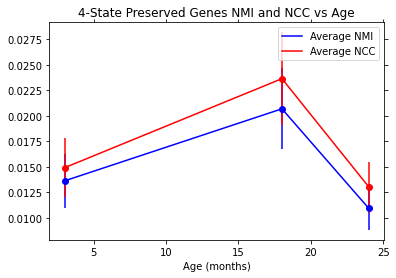

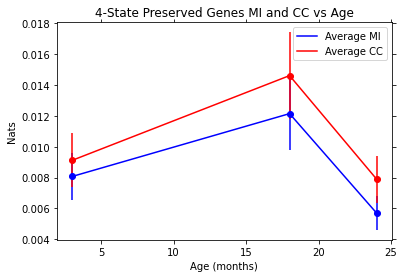

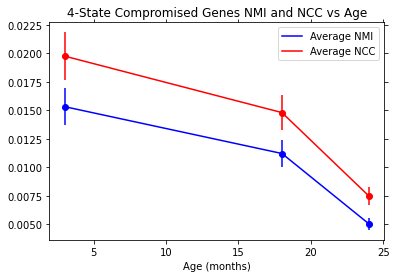

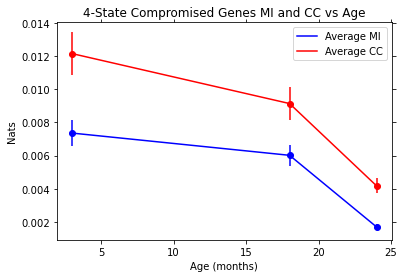

In [5]:
for i in range(0,num_of_bottom_pairs):
    if not i in bottom_indices_to_avoid:

        TF = np.array(data[bottom_pairs['TF'][i]])
        TG = np.array(data[bottom_pairs['TG'][i]])

        #Splitting up age groups
        TF3, TF18, TF24 = Split_By_Ages(TF)
        TG3, TG18, TG24 = Split_By_Ages(TG)

        botNI3s = np.append(botNI3s, Norm_Mutual_Info_Chan_Cap_Four_State(TF3, TG3)[0])
        botNC3s = np.append(botNC3s, Norm_Mutual_Info_Chan_Cap_Four_State(TF3, TG3)[1])
        botI3s = np.append(botI3s, Norm_Mutual_Info_Chan_Cap_Four_State(TF3, TG3)[2])
        botC3s = np.append(botC3s, Norm_Mutual_Info_Chan_Cap_Four_State(TF3, TG3)[3])

        botNI18s = np.append(botNI18s, Norm_Mutual_Info_Chan_Cap_Four_State(TF18, TG18)[0])
        botNC18s = np.append(botNC18s, Norm_Mutual_Info_Chan_Cap_Four_State(TF18, TG18)[1])
        botI18s = np.append(botI18s, Norm_Mutual_Info_Chan_Cap_Four_State(TF18, TG18)[2])
        botC18s = np.append(botC18s, Norm_Mutual_Info_Chan_Cap_Four_State(TF18, TG18)[3])

        botNI24s = np.append(botNI24s, Norm_Mutual_Info_Chan_Cap_Four_State(TF24, TG24)[0])
        botNC24s = np.append(botNC24s, Norm_Mutual_Info_Chan_Cap_Four_State(TF24, TG24)[1])
        botI24s = np.append(botI24s, Norm_Mutual_Info_Chan_Cap_Four_State(TF24, TG24)[2])
        botC24s = np.append(botC24s, Norm_Mutual_Info_Chan_Cap_Four_State(TF24, TG24)[3])



#processing data and finding statistics. Should have put everything in an array and looped through...


topNI3s, topNC3s = remove_nan(topNI3s, topNC3s)
topNI18s, topNC18s = remove_nan(topNI18s, topNC18s)
topNI24s, topNC24s = remove_nan(topNI24s, topNC24s)
topI3s, topC3s = remove_nan(topI3s, topC3s)
topI18s, topC18s = remove_nan(topI18s, topC18s)
topI24s, topC24s = remove_nan(topI24s, topC24s)

botNI3s, botNC3s = remove_nan(botNI3s, botNC3s)
botNI18s, botNC18s = remove_nan(botNI18s, botNC18s)
botNI24s, botNC24s = remove_nan(botNI24s, botNC24s)
botI3s, botC3s = remove_nan(botI3s, botC3s)
botI18s, botC18s = remove_nan(botI18s, botC18s)
botI24s, botC24s = remove_nan(botI24s, botC24s)

topNI3s = remove_complex(topNI3s)
topNI18s = remove_complex(topNI18s)
topNI24s = remove_complex(topNI24s)
topNC3s = remove_complex(topNC3s)
topNC18s = remove_complex(topNC18s)
topNC24s = remove_complex(topNC24s)
topI3s = remove_complex(topI3s)
topI18s = remove_complex(topI18s)
topI24s = remove_complex(topI24s)
topC3s = remove_complex(topC3s)
topC18s = remove_complex(topC18s)
topC24s = remove_complex(topC24s)

botNI3s = remove_complex(botNI3s)
botNI18s = remove_complex(botNI18s)
botNI24s = remove_complex(botNI24s)
botNC3s = remove_complex(botNC3s)
botNC18s = remove_complex(botNC18s)
botNC24s = remove_complex(botNC24s)
botI3s = remove_complex(botI3s)
botI18s = remove_complex(botI18s)
botI24s = remove_complex(botI24s)
botC3s = remove_complex(botC3s)
botC18s = remove_complex(botC18s)
botC24s = remove_complex(botC24s)

topNI3s_ave = np.average(topNI3s)
topNC3s_ave = np.average(topNC3s)
topNI18s_ave = np.average(topNI18s)
topNC18s_ave = np.average(topNC18s)
topNI24s_ave = np.average(topNI24s)
topNC24s_ave = np.average(topNC24s)
topI3s_ave = np.average(topI3s)
topC3s_ave = np.average(topC3s)
topI18s_ave = np.average(topI18s)
topC18s_ave = np.average(topC18s)
topI24s_ave = np.average(topI24s)
topC24s_ave = np.average(topC24s)

botNI3s_ave = np.average(botNI3s)
botNC3s_ave = np.average(botNC3s)
botNI18s_ave = np.average(botNI18s)
botNC18s_ave = np.average(botNC18s)
botNI24s_ave = np.average(botNI24s)
botNC24s_ave = np.average(botNC24s)
botI3s_ave = np.average(botI3s)
botC3s_ave = np.average(botC3s)
botI18s_ave = np.average(botI18s)
botC18s_ave = np.average(botC18s)
botI24s_ave = np.average(botI24s)
botC24s_ave = np.average(botC24s)

topNI3s_std = np.average(topNI3s)
topNC3s_std = np.average(topNC3s)
topNI18s_std = np.average(topNI18s)
topNC18s_std = np.average(topNC18s)
topNI24s_std = np.average(topNI24s)
topNC24s_std = np.average(topNC24s)
topI3s_std = np.average(topI3s)
topC3s_std = np.average(topC3s)
topI18s_std = np.average(topI18s)
topC18s_std = np.average(topC18s)
topI24s_std = np.average(topI24s)
topC24s_std = np.average(topC24s)

botNI3s_std = np.average(botNI3s)
botNC3s_std = np.average(botNC3s)
botNI18s_std = np.average(botNI18s)
botNC18s_std = np.average(botNC18s)
botNI24s_std = np.average(botNI24s)
botNC24s_std = np.average(botNC24s)
botI3s_std = np.average(botI3s)
botC3s_std = np.average(botC3s)
botI18s_std = np.average(botI18s)
botC18s_std = np.average(botC18s)
botI24s_std = np.average(botI24s)
botC24s_std = np.average(botC24s)

topNI3s_stderr = topNI3s_std/(np.sqrt(np.size(topNI3s)))
topNC3s_stderr = topNC3s_std/(np.sqrt(np.size(topNC3s)))
topNI18s_stderr = topNI18s_std/(np.sqrt(np.size(topNI18s)))
topNC18s_stderr = topNC18s_std/(np.sqrt(np.size(topNC18s)))
topNI24s_stderr = topNI24s_std/(np.sqrt(np.size(topNI24s)))
topNC24s_stderr = topNC24s_std/(np.sqrt(np.size(topNC24s)))
topI3s_stderr = topI3s_std/(np.sqrt(np.size(topI3s)))
topC3s_stderr = topC3s_std/(np.sqrt(np.size(topC3s)))
topI18s_stderr = topI18s_std/(np.sqrt(np.size(topI18s)))
topC18s_stderr = topC18s_std/(np.sqrt(np.size(topC18s)))
topI24s_stderr = topI24s_std/(np.sqrt(np.size(topI24s)))
topC24s_stderr = topC24s_std/(np.sqrt(np.size(topC24s)))

botNI3s_stderr = botNI3s_std/(np.sqrt(np.size(botNI3s)))
botNC3s_stderr = botNC3s_std/(np.sqrt(np.size(botNC3s)))
botNI18s_stderr = botNI18s_std/(np.sqrt(np.size(botNI18s)))
botNC18s_stderr = botNC18s_std/(np.sqrt(np.size(botNC18s)))
botNI24s_stderr = botNI24s_std/(np.sqrt(np.size(botNI24s)))
botNC24s_stderr = botNC24s_std/(np.sqrt(np.size(botNC24s)))
botI3s_stderr = botI3s_std/(np.sqrt(np.size(botI3s)))
botC3s_stderr = botC3s_std/(np.sqrt(np.size(botC3s)))
botI18s_stderr = botI18s_std/(np.sqrt(np.size(botI18s)))
botC18s_stderr = botC18s_std/(np.sqrt(np.size(botC18s)))
botI24s_stderr = botI24s_std/(np.sqrt(np.size(botI24s)))
botC24s_stderr = botC24s_std/(np.sqrt(np.size(botC24s)))

topNIs_ave = np.array([topNI3s_ave, topNI18s_ave, topNI24s_ave])
topNIs_stderr = np.array([topNI3s_stderr, topNI18s_stderr, topNI24s_stderr])

topNCs_ave = np.array([topNC3s_ave, topNC18s_ave, topNC24s_ave])
topNCs_stderr = np.array([topNC3s_stderr, topNC18s_stderr, topNC24s_stderr])

topIs_ave = np.array([topI3s_ave, topI18s_ave, topI24s_ave])
topIs_stderr = np.array([topI3s_stderr, topI18s_stderr, topI24s_stderr])

topCs_ave = np.array([topC3s_ave, topC18s_ave, topC24s_ave])
topCs_stderr = np.array([topC3s_stderr, topC18s_stderr, topC24s_stderr])



botNIs_ave = np.array([botNI3s_ave, botNI18s_ave, botNI24s_ave])
botNIs_stderr = np.array([botNI3s_stderr, botNI18s_stderr, botNI24s_stderr])

botNCs_ave = np.array([botNC3s_ave, botNC18s_ave, botNC24s_ave])
botNCs_stderr = np.array([botNC3s_stderr, botNC18s_stderr, botNC24s_stderr])

botIs_ave = np.array([botI3s_ave, botI18s_ave, botI24s_ave])
botIs_stderr = np.array([botI3s_stderr, botI18s_stderr, botI24s_stderr])

botCs_ave = np.array([botC3s_ave, botC18s_ave, botC24s_ave])
botCs_stderr = np.array([botC3s_stderr, botC18s_stderr, botC24s_stderr])


age = np.array([3,18,24])


plt.figure(1)
plt.plot(age, topNIs_ave, c = 'b', label = "Average NMI")
plt.errorbar(age, topNIs_ave, yerr = topNIs_stderr, fmt = 'o', c = 'b')
plt.plot(age, topNCs_ave, c = 'red', label = "Average NCC")
plt.errorbar(age, topNCs_ave, yerr = topNCs_stderr, fmt = 'o', c = 'red')
plt.tick_params(which='both',top=True,right=True)
plt.legend()
plt.title("4-State Preserved Genes NMI and NCC vs Age")
plt.xlabel("Age (months)")
plt.savefig("4State_Preserved_NMI_NCC")
plt.show()

plt.figure(2)
plt.plot(age, topIs_ave, c = 'b', label = "Average MI")
plt.errorbar(age, topIs_ave, yerr = topIs_stderr, fmt = 'o', c = 'b')
plt.plot(age, topCs_ave, c = 'red', label = "Average CC")
plt.errorbar(age, topCs_ave, yerr = topCs_stderr, fmt = 'o', c = 'red')
plt.tick_params(which='both',top=True,right=True)
plt.legend()
plt.title("4-State Preserved Genes MI and CC vs Age")
plt.xlabel("Age (months)")
plt.ylabel("Nats")
plt.savefig("4State_Preserved_MI_CC")
plt.show()


plt.figure(3)
plt.plot(age, botNIs_ave, c = 'b', label = "Average NMI")
plt.errorbar(age, botNIs_ave, yerr = botNIs_stderr, fmt = 'o', c = 'b')
plt.plot(age, botNCs_ave, c = 'red', label = "Average NCC")
plt.errorbar(age, botNCs_ave, yerr = botNCs_stderr, fmt = 'o', c = 'red')
plt.tick_params(which='both',top=True,right=True)
plt.legend()
plt.title("4-State Compromised Genes NMI and NCC vs Age")
plt.xlabel("Age (months)")
plt.savefig("4State_Compromised_NMI_NCC")
plt.show()

plt.figure(4)
plt.plot(age, botIs_ave, c = 'b', label = "Average MI")
plt.errorbar(age, botIs_ave, yerr = botIs_stderr, fmt = 'o', c = 'b')
plt.plot(age, botCs_ave, c = 'red', label = "Average CC")
plt.errorbar(age, botCs_ave, yerr = botCs_stderr, fmt = 'o', c = 'red')
plt.tick_params(which='both',top=True,right=True)
plt.legend()
plt.title("4-State Compromised Genes MI and CC vs Age")
plt.xlabel("Age (months)")
plt.ylabel("Nats")
plt.savefig("4State_Compromised_MI_CC")
plt.show()

np.savez("4State_Preserved_Compromised_Results", topNIs_ave=topNIs_ave, topNIs_stderr=topNIs_stderr, topNCs_ave=topNCs_ave, topNCs_stderr=topNCs_stderr, topIs_ave=topIs_ave, topIs_stderr=topIs_stderr, topCs_ave=topCs_ave, topCs_stderr=topCs_stderr, botNIs_ave=botNIs_ave, botNIs_stderr=botNIs_stderr, botNCs_ave=botNCs_ave, botNCs_stderr=botNCs_stderr, botIs_ave=botIs_ave, botIs_stderr=botIs_stderr, botCs_ave=botCs_ave, botCs_stderr=botCs_stderr)




<Figure size 432x288 with 0 Axes>

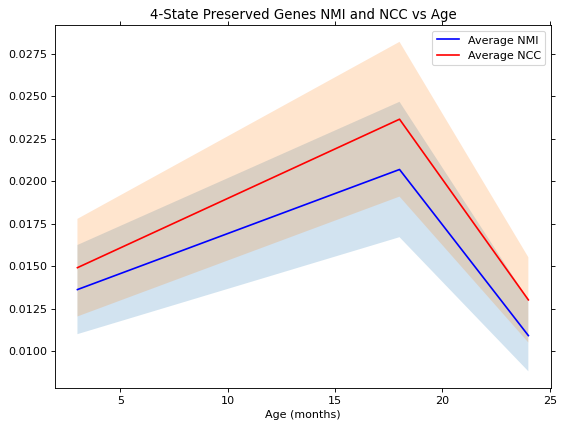

<Figure size 432x288 with 0 Axes>

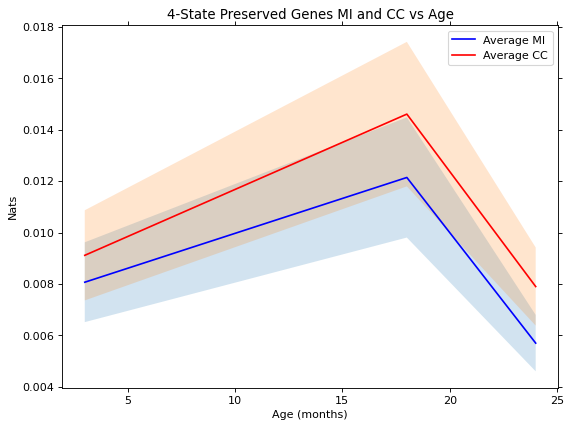

<Figure size 432x288 with 0 Axes>

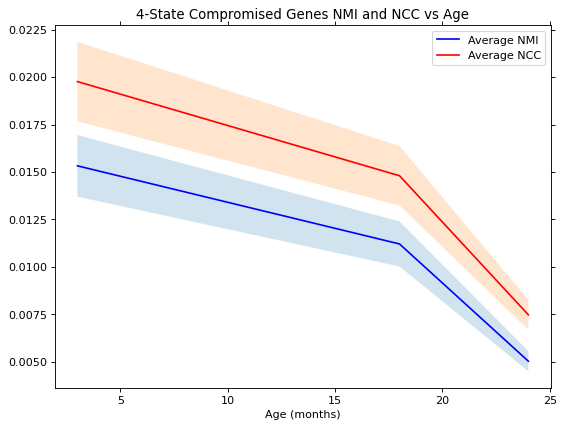

<Figure size 432x288 with 0 Axes>

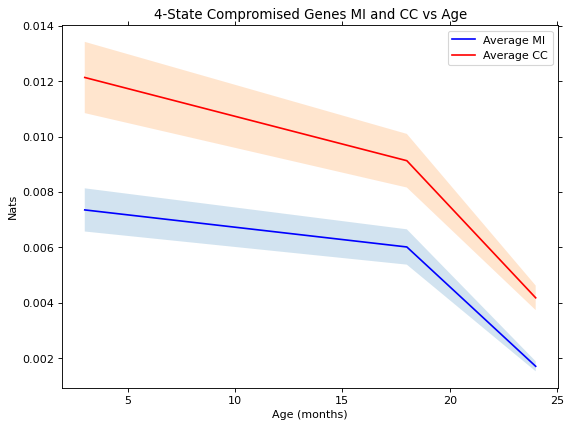

In [6]:
age = np.array([3,18,24])

from matplotlib.pyplot import figure

plt.figure(1)
figure(figsize=(8, 6), dpi=80)
plt.plot(age, topNIs_ave, c = 'b', label = "Average NMI")
#plt.errorbar(age, topNIs_ave, yerr = topNIs_stderr, fmt = 'o', c = 'b')
plt.fill_between(age, topNIs_ave - topNIs_stderr, topNIs_ave + topNIs_stderr, alpha=0.2)
plt.plot(age, topNCs_ave, c = 'red', label = "Average NCC")
#plt.errorbar(age, topNCs_ave, yerr = topNCs_stderr, fmt = 'o', c = 'red')
plt.fill_between(age, topNCs_ave - topNCs_stderr, topNCs_ave + topNCs_stderr, alpha=0.2)
plt.tick_params(which='both',top=True,right=True)
plt.legend()
plt.title("4-State Preserved Genes NMI and NCC vs Age")
plt.xlabel("Age (months)")
plt.savefig("4State_Preserved_NMI_NCC")
plt.show()

plt.figure(2)
figure(figsize=(8, 6), dpi=80)
plt.plot(age, topIs_ave, c = 'b', label = "Average MI")
#plt.errorbar(age, topIs_ave, yerr = topIs_stderr, fmt = 'o', c = 'b')
plt.fill_between(age, topIs_ave - topIs_stderr, topIs_ave + topIs_stderr, alpha=0.2)
plt.plot(age, topCs_ave, c = 'red', label = "Average CC")
#plt.errorbar(age, topCs_ave, yerr = topCs_stderr, fmt = 'o', c = 'red')
plt.fill_between(age, topCs_ave - topCs_stderr, topCs_ave + topCs_stderr, alpha=0.2)
plt.tick_params(which='both',top=True,right=True)
plt.legend()
plt.title("4-State Preserved Genes MI and CC vs Age")
plt.xlabel("Age (months)")
plt.ylabel("Nats")
plt.savefig("4State_Preserved_MI_CC")
plt.show()


plt.figure(3)
figure(figsize=(8, 6), dpi=80)
plt.plot(age, botNIs_ave, c = 'b', label = "Average NMI")
#plt.errorbar(age, botNIs_ave, yerr = botNIs_stderr, fmt = 'o', c = 'b')
plt.fill_between(age, botNIs_ave - botNIs_stderr, botNIs_ave + botNIs_stderr, alpha=0.2)
plt.plot(age, botNCs_ave, c = 'red', label = "Average NCC")
#plt.errorbar(age, botNCs_ave, yerr = botNCs_stderr, fmt = 'o', c = 'red')
plt.fill_between(age, botNCs_ave - botNCs_stderr, botNCs_ave + botNCs_stderr, alpha=0.2)
plt.tick_params(which='both',top=True,right=True)
plt.legend()
plt.title("4-State Compromised Genes NMI and NCC vs Age")
plt.xlabel("Age (months)")
plt.savefig("4State_Compromised_NMI_NCC")
plt.show()

plt.figure(4)
figure(figsize=(8, 6), dpi=80)
plt.plot(age, botIs_ave, c = 'b', label = "Average MI")
#plt.errorbar(age, botIs_ave, yerr = botIs_stderr, fmt = 'o', c = 'b')
plt.fill_between(age, botIs_ave - botIs_stderr, botIs_ave + botIs_stderr, alpha=0.2)
plt.plot(age, botCs_ave, c = 'red', label = "Average CC")
#plt.errorbar(age, botCs_ave, yerr = botCs_stderr, fmt = 'o', c = 'red')
plt.fill_between(age, botCs_ave - botCs_stderr, botCs_ave + botCs_stderr, alpha=0.2)
plt.tick_params(which='both',top=True,right=True)
plt.legend()
plt.title("4-State Compromised Genes MI and CC vs Age")
plt.xlabel("Age (months)")
plt.ylabel("Nats")
plt.savefig("4State_Compromised_MI_CC")
plt.show()


In [7]:
# Reducing to two time points only!

topNIs_ave = np.array([topNI3s_ave,  topNI24s_ave])
topNIs_stderr = np.array([topNI3s_stderr, topNI24s_stderr])

topNCs_ave = np.array([topNC3s_ave, topNC24s_ave])
topNCs_stderr = np.array([topNC3s_stderr, topNC24s_stderr])

topIs_ave = np.array([topI3s_ave, topI24s_ave])
topIs_stderr = np.array([topI3s_stderr,  topI24s_stderr])

topCs_ave = np.array([topC3s_ave,  topC24s_ave])
topCs_stderr = np.array([topC3s_stderr, topC24s_stderr])



botNIs_ave = np.array([botNI3s_ave, botNI24s_ave])
botNIs_stderr = np.array([botNI3s_stderr,  botNI24s_stderr])

botNCs_ave = np.array([botNC3s_ave,  botNC24s_ave])
botNCs_stderr = np.array([botNC3s_stderr,  botNC24s_stderr])

botIs_ave = np.array([botI3s_ave,  botI24s_ave])
botIs_stderr = np.array([botI3s_stderr,  botI24s_stderr])

botCs_ave = np.array([botC3s_ave,  botC24s_ave])
botCs_stderr = np.array([botC3s_stderr, botC24s_stderr])


In [8]:
from scipy.stats import mannwhitneyu

mannwhitneyu(topNC3s, topNC24s)

MannwhitneyuResult(statistic=341.0, pvalue=0.6907042978492409)

In [9]:
from scipy.stats import mannwhitneyu

mannwhitneyu(botNC3s,  botNC24s)

MannwhitneyuResult(statistic=5696.0, pvalue=4.477035716048993e-07)

In [10]:
from scipy.stats import mannwhitneyu

mannwhitneyu(topI3s, topI24s)

MannwhitneyuResult(statistic=384.0, pvalue=0.7423827913206823)

In [11]:
from scipy.stats import mannwhitneyu

mannwhitneyu(botI3s,  botI24s)

MannwhitneyuResult(statistic=6409.0, pvalue=1.0658056847896668e-12)

<Figure size 432x288 with 0 Axes>

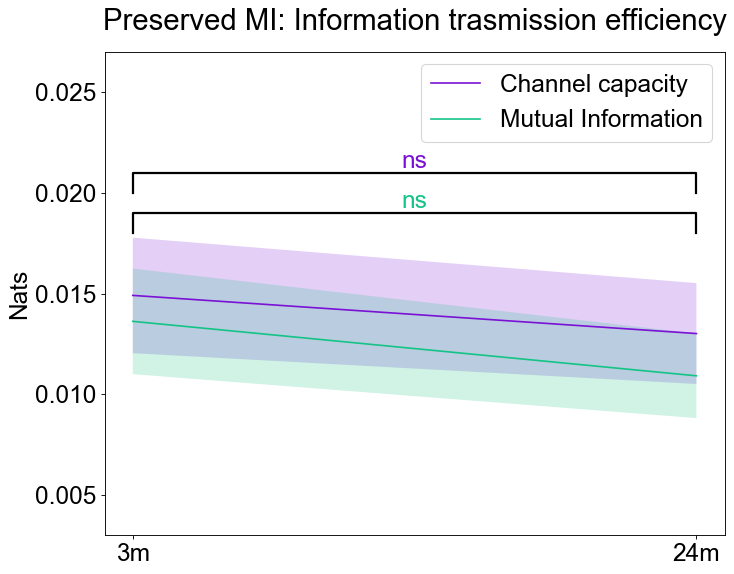

In [12]:
age = np.array([3,24])

from matplotlib.pyplot import figure

plt.figure(1)
figure(figsize=(10, 8), dpi=80)
#plt.figure(figsize=(14, 8))
plt.rcParams.update({'font.size': 22,'font.family':'sans-serif', 'font.sans-serif':"Arial"})

plt.plot(age, topNCs_ave, c = '#7A12D6', label = "Channel capacity")

plt.fill_between(age, topNCs_ave - topNCs_stderr, topNCs_ave + topNCs_stderr, facecolor = '#7A12D6', alpha=0.2)
plt.plot(age, topNIs_ave, c = '#14c486', label = "Mutual Information")

plt.fill_between(age, topNIs_ave - topNIs_stderr, topNIs_ave + topNIs_stderr, facecolor = '#14c486', alpha=0.2)

tick_locs = [3, 24]
tick_lbls = ['3m', '24m']
plt.xticks(tick_locs, tick_lbls)

plt.ylim([0.003, 0.027])
#plt.tick_params(which='both',top=True,right=True)
plt.legend(loc='upper right')

# statistical annotation
x1, x2 = 3,24  # columns '3m' and '24m' (first column: 0, see plt.xticks())
y, h, col = 0.02, 0.001, '#7A12D6'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2, c='k')
plt.text((x1+x2)*0.5, y+h, "ns", ha='center', va='bottom', color=col)

# statistical annotation
x1, x2 = 3,24  # columns '3m' and '24m' (first column: 0, see plt.xticks())
y, h, col = 0.018, 0.001, '#14c486'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2, c='k')
plt.text((x1+x2)*0.5, y+h, "ns", ha='center', va='bottom', color=col)

plt.title("Preserved MI: Information trasmission efficiency", pad=20)
plt.ylabel("Nats")
plt.savefig("Preserved MI: Information trasmission efficiency")
plt.show()




[Text(0.5, 0, ''), Text(0, 0.5, 'Nats')]

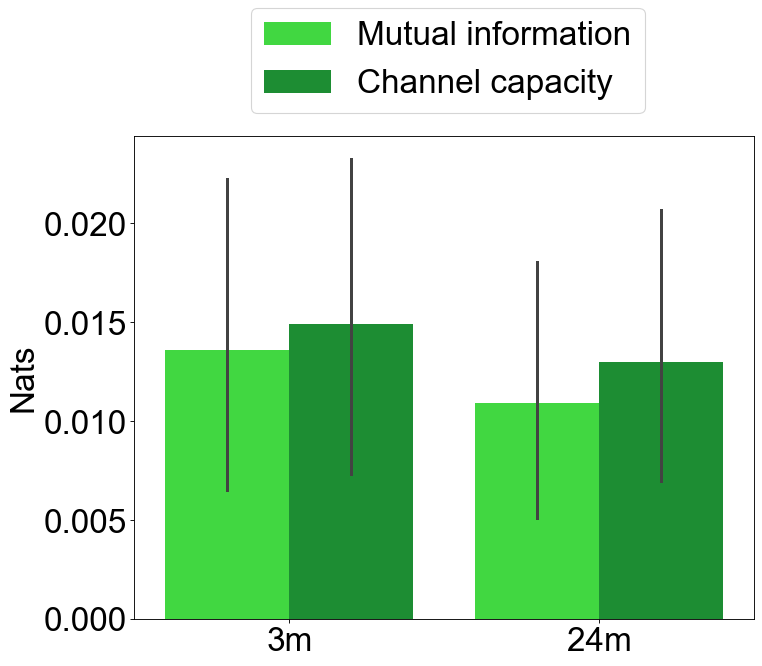

In [15]:

import seaborn as sns
figure(figsize=(10, 8), dpi=80)
#plt.figure(figsize=(14, 8))
plt.rcParams.update({'font.size': 30,'font.family':'sans-serif', 'font.sans-serif':"Arial"})

# Create an array with the colors you want to use
colors = [ "#28F028","#0AA028"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

# print(len(topNC3s))
# print(len(topNC24s))

# print(len(topNI3s))
# print(len(topNI24s))

data=pd.DataFrame.from_dict({'Value':list(topNC3s)+list(topNC24s)+list(topNI3s)+list(topNI24s),'Category':['Channel capacity']*27+['Channel capacity']*27+['Mutual information']*27+['Mutual information']*27, 'Age': ['3m']*27+['24m']*27+['3m']*27+['24m']*27})

data

ax = sns.barplot(x="Age", y="Value", hue="Category", hue_order=['Mutual information','Channel capacity'], data=data) #, ci='sd'

ax.legend(loc='upper right', bbox_to_anchor=(0.85, 1.3))
ax.set(xlabel='', ylabel='Nats')


<Figure size 432x288 with 0 Axes>

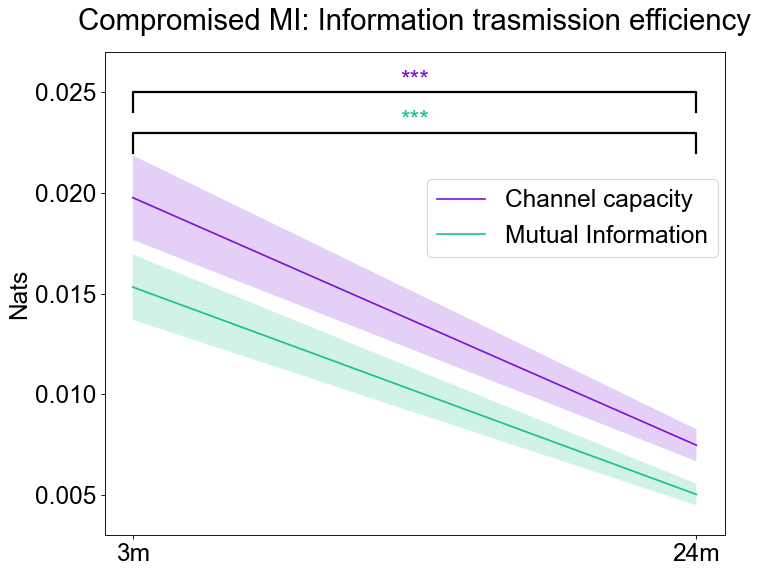

In [54]:

plt.figure(3)
figure(figsize=(10, 8), dpi=80)
#plt.figure(figsize=(14, 8))
plt.rcParams.update({'font.size': 22,'font.family':'sans-serif'})

plt.plot(age, botNCs_ave, c = '#7A12D6', label = "Channel capacity")
#plt.errorbar(age, botNCs_ave, yerr = botNCs_stderr, fmt = 'o', c = 'red')
plt.fill_between(age, botNCs_ave - botNCs_stderr, botNCs_ave + botNCs_stderr,facecolor = '#7A12D6', alpha=0.2)
plt.plot(age, botNIs_ave, c = '#14c486', label = "Mutual Information")
#plt.errorbar(age, botNIs_ave, yerr = botNIs_stderr, fmt = 'o', c = 'b')
plt.fill_between(age, botNIs_ave - botNIs_stderr, botNIs_ave + botNIs_stderr, facecolor = '#14c486', alpha=0.2)
plt.ylim([0.003, 0.027])

tick_locs = [3,  24]
tick_lbls = ['3m', '24m']
plt.xticks(tick_locs, tick_lbls)

# statistical annotation
x1, x2 = 3,24  # columns '3m' and '24m' (first column: 0, see plt.xticks())
y, h, col = 0.024, 0.001, '#7A12D6'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2, c='k')
plt.text((x1+x2)*0.5, y+h, "***", ha='center', va='bottom', color=col)

# statistical annotation
x1, x2 = 3,24  # columns '3m' and '24m' (first column: 0, see plt.xticks())
y, h, col = 0.022, 0.001, '#14c486'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2, c='k')
plt.text((x1+x2)*0.5, y+h, "***", ha='center', va='bottom', color=col)

#plt.tick_params(which='both',top=True,right=True)
plt.legend( bbox_to_anchor=(0.5, 0.55))
plt.title("Compromised MI: Information trasmission efficiency", pad=20)
plt.ylabel("Nats")
plt.savefig("Compromised MI: Information trasmission efficiency")
plt.show()


[Text(0.5, 0, ''), Text(0, 0.5, 'Nats')]

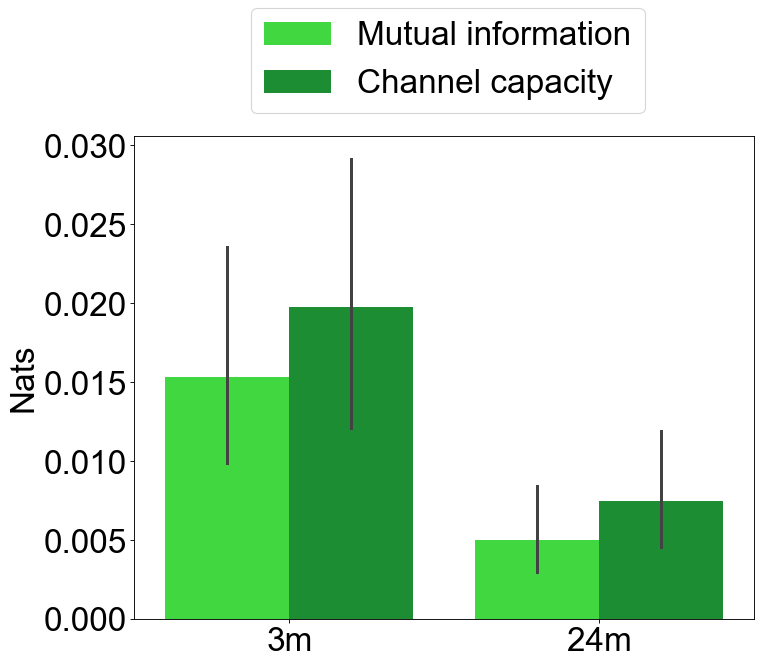

In [18]:
import seaborn as sns
figure(figsize=(10, 8), dpi=80)
#plt.figure(figsize=(14, 8))
plt.rcParams.update({'font.size': 30,'font.family':'sans-serif', 'font.sans-serif':"Arial"})

# Create an array with the colors you want to use
colors = [ "#28F028","#0AA028"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

# print(len(botNC3s))
# print(len(botNC24s))

# print(len(botNI3s))
# print(len(botNI24s))

data=pd.DataFrame.from_dict({'Value':list(botNC3s)+list(botNC24s)+list(botNI3s)+list(botNI24s),'Category':['Channel capacity']*89+['Channel capacity']*89+['Mutual information']*89+['Mutual information']*89, 'Age': ['3m']*89+['24m']*89+['3m']*89+['24m']*89})

data

ax = sns.barplot(x="Age", y="Value", hue="Category", hue_order=['Mutual information','Channel capacity'], data=data) #, ci='sd'

ax.legend(loc='upper right', bbox_to_anchor=(0.85, 1.3))
ax.set(xlabel='', ylabel='Nats')